<a href="https://colab.research.google.com/github/dookda/cmu_water_balance/blob/main/testLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(108, 1)
86


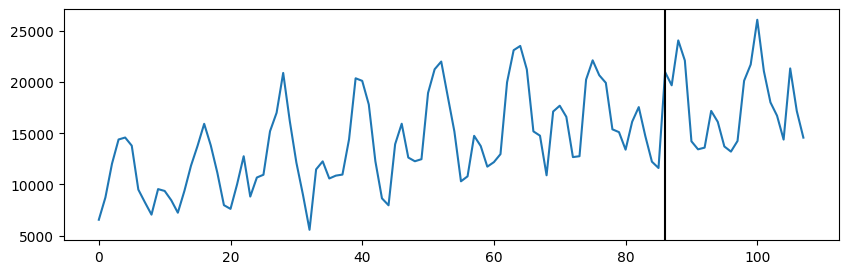

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input

# path monthly car sale.csv from githubusercontent.com/jbrownlee/Datasets/master
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv', header=0)
df.head()

# use column sales
df = df[['Sales']]
df.head()

df.isnull().sum()
print(df.shape)

n_train = int(df.shape[0] * 0.8)
print(n_train)

plt.figure(figsize=(10, 3))
plt.plot(df)
# df.plot()
plt.axvline(x=n_train,c='k')
plt.show()

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_sc = scaler.fit_transform(df)

def convertToMatrix(data, step=1):
  X, Y = [], []
  for i in range(len(data)-step):
    x, y = data[i:i+step], data[i+step]
    X.append(x)
    Y.append(y)
  return np.array(X), np.array(Y)

train, test = data_sc[:n_train], data_sc[n_train:]

step = 3
X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(83, 3, 1) (83, 1)
(19, 3, 1) (19, 1)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_47 (LSTM)                  │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

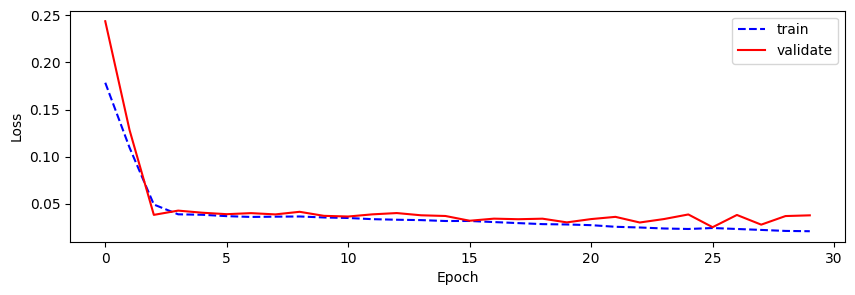

In [76]:
# LSTM single dense
model = Sequential()
model.add(Input(shape=(step, 1)))
model.add(LSTM(units=64,
               activation='relu', #'tanh'
               recurrent_activation='sigmoid'))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=4,
    validation_data=(X_test, y_test),
    verbose=0)

plt.figure(figsize=(10, 3))
plt.plot(history.history['loss'], 'b--', label='train',)
plt.plot(history.history['val_loss'], 'r-' ,label='validate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                  │ (None, 1, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_45 (LSTM)                  │ (None, 1, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_46 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

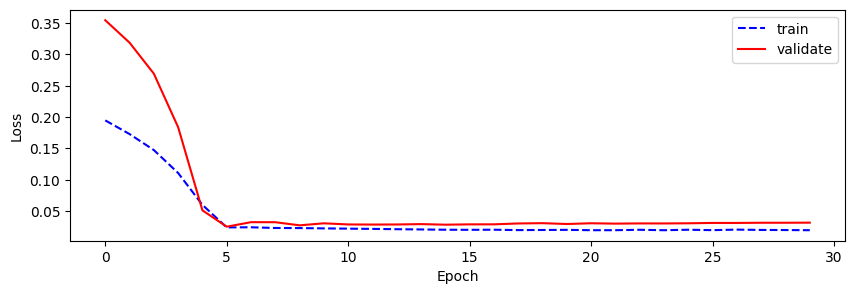

In [73]:
# LSTM multiple densee
model = Sequential()
model.add(Input(shape=(step, 1)))
model.add(LSTM(units=64,
               activation='relu', #'tanh',
               recurrent_activation='sigmoid',
               return_sequences=True))
model.add(LSTM(units=32,
               activation='relu', #'tanh',
               return_sequences=True))
model.add(LSTM(units=16,
               activation='relu'))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=4,
    validation_data=(X_test, y_test),
    verbose=0)

plt.figure(figsize=(10, 3))
plt.plot(history.history['loss'], 'b--', label='train',)
plt.plot(history.history['val_loss'], 'r-' ,label='validate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_10 (GRU)                    │ (None, 1, 64)          │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11 (GRU)                    │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,305 (87.13 KB)

 Trainable params: 22,305 (87.13 KB)

 Non-trainable params: 0 (0.00 B)

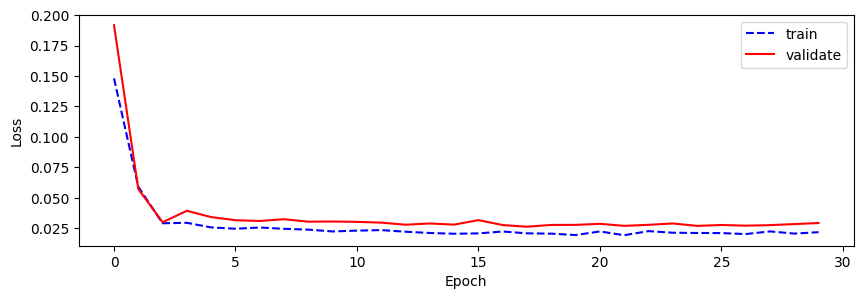

In [67]:
# GRU
model = Sequential()
model.add(Input(shape=(step, 1)))
model.add(GRU(units=64,
               activation='relu', #'tanh',
               recurrent_activation='sigmoid',
               return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=32,
               activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=4,
    validation_data=(X_test, y_test),
    verbose=0)

plt.figure(figsize=(10, 3))
plt.plot(history.history['loss'], 'b--', label='train',)
plt.plot(history.history['val_loss'], 'r-' ,label='validate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_41 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_42 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

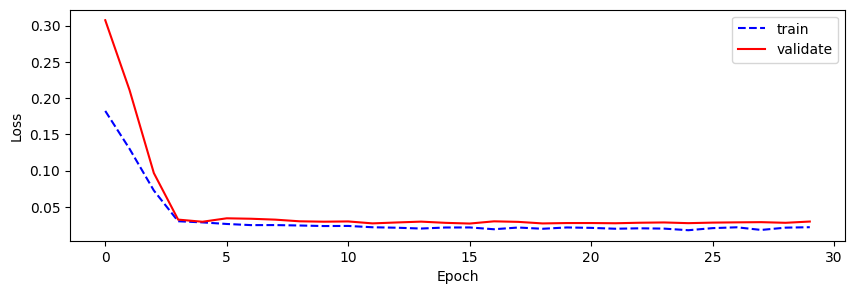

In [70]:
# สูตรจาก chat
model = Sequential()
model.add(LSTM(64,
               activation='tanh',
               return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,
               activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=4,
    validation_data=(X_test, y_test),
    verbose=0)

plt.figure(figsize=(10, 3))
plt.plot(history.history['loss'], 'b--', label='train',)
plt.plot(history.history['val_loss'], 'r-' ,label='validate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
R2 train: 0.5270568589400492
R2 test: -0.18723000389662414
RMSE train: 2918.6254023925867
RMSE test: 3984.7141136759415


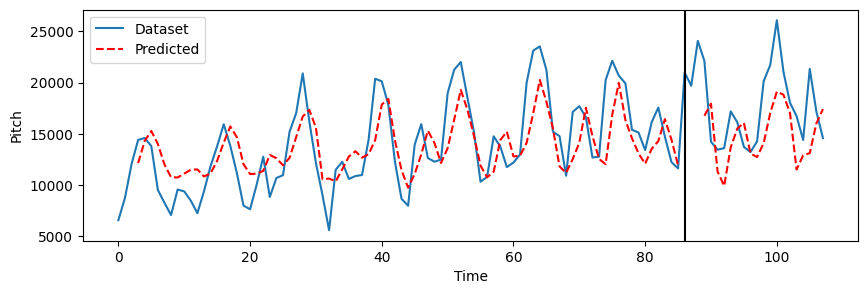

In [91]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

y_train_inv = scaler.inverse_transform(y_train)
y_test_inv = scaler.inverse_transform(y_test)

r2_train = r2_score(y_train_inv, train_predict_inv)
r2_test = r2_score(y_test_inv, test_predict_inv)

rmse_train = np.sqrt(mean_squared_error(y_train_inv, train_predict_inv))
rmse_test = np.sqrt(mean_squared_error(y_test_inv, test_predict_inv))

print(f'R2 train: {r2_train}')
print(f'R2 test: {r2_test}')
print(f'RMSE train: {rmse_train}')
print(f'RMSE test: {rmse_test}')

prefix = np.empty(step).reshape(-1, 1)
prefix.fill(np.nan)
train_predict_inv = np.concatenate((prefix, train_predict_inv), axis=0)
test_predict_inv = np.concatenate((prefix, test_predict_inv), axis=0)

predicted = np.concatenate((train_predict_inv, test_predict_inv), axis=0)
# print(predicted)

plt.figure(figsize=(10, 3))
plt.plot(df, label='Dataset')
plt.plot(predicted, 'r--', label='Predicted')
plt.axvline(x=n_train, color='k', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Pitch')
plt.legend()
plt.show()

In [69]:
X_input = X_train[-step:]
pred = model.predict(X_input)
pred_inv = scaler.inverse_transform(pred)
pred_inv = np.squeeze(pred_inv)
print('predict: ', pred_inv)

y_true = y_train[-1]
y_true_inv = scaler.inverse_transform(y_true.reshape(-1, 1))
y_true_inv = np.squeeze(y_true_inv)
print('y_true: ',y_true_inv)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
predict:  12374.09
y_true:  11608.0
